# Problem 6.29 from Callister
A cylindrical specimen of aluminum having a diameter of 0.505 in (12.8 mm) and a guage length of 2.000 in (50.800 mm) is pulled in tension.  Use the load - elongation characteristics shown in the following table to complete the following:
1. Plot the data as engineering stress versus engineering strain.
1. Compute the modulus of elasticity.
1. Determine the yield strength using a strain offset of 0.002.
1. Determine the ultimate tensile strength of this allow.
1. Determine the ductility in percent elongation.
1. Compute the modulus of resilience.

## Read Values and Calculate Stress and Strain
The values given in the problem are stored in an external comma separated file.  We read them into this notebook using pandas.  This creates a [DataFrame](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe) object.

In [1]:
import pandas as pd; import numpy as np;from math import *
Data=pd.read_csv('6_29.csv');
Data.head(10)

,Load (N),Length (mm)
0,0,50.800
1,7330,50.851
2,15100,50.902
3,23100,50.952
4,30400,51.003
5,34400,51.054
6,38400,51.308
7,41300,51.816
8,44800,52.832
9,46200,53.848


We then calculate the stress and strain.  In doing so we create new Numpy arrays since we are mainly need to numerical calculations.

In [2]:
d=12.8; area=pi*(d/2)**2;
Stress = Data["Load (N)"].values/area

In [3]:
l_0=50.800
Strain = (Data["Length (mm)"]-l_0).values/l_0

## Plot the data as engineering stress versus engineering strain.

In [4]:
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

In [5]:
def format_plot(a):
    """Format a plot for presenation.  Function takes one parameter, a matplotlib.axes object."""
    fsx = 4.5
    fsy = 4.5

    a.tick_params(labelsize=14)
    a.xaxis.label.set_size(16)
    a.yaxis.label.set_size(16)
    a.title.set_size(16)
    a.get_figure().set_size_inches(fsx, fsy)
    a.grid(1)

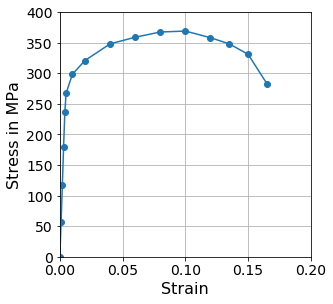

In [6]:
MyFigure, MyAxes = plt.subplots(1, 1);
MyAxes.plot(Strain,Stress,'-o');MyAxes.set_xlabel("Strain");MyAxes.set_ylabel("Stress in MPa")
MyAxes.set_xlim((0,0.20));MyAxes.set_ylim((0,400))
format_plot(MyAxes)

## Compute the modulus of elasticity
For this, we to calculate the slope of the first few data points.  For this, we will use the [linear regression function](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.linregress.html) from [SciPy](https://docs.scipy.org/doc/scipy-0.14.0/reference/index.html)

In [7]:
from scipy.stats import linregress
(m,b)=linregress(Strain[0:4],Stress[0:4])[0:2];
print("The modulus of elasticity is {:.0f} MPA. \nThe intercept is {:3.1f}".format(m,b))

The modulus of elasticity is 60005 MPA. 
The intercept is -1.6


We will now plot the data with the linear line.

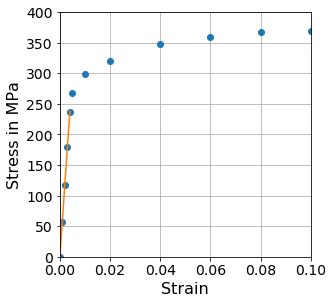

In [8]:
s=np.linspace(0,Strain[4],2)
y=m*s+b
FigureB, AxesB = plt.subplots(1, 1);
AxesB.plot (Strain,Stress,'o'); AxesB.set_xlabel("Strain"); AxesB.set_ylabel("Stress in MPa")
AxesB.plot(s,y);AxesB.set_xlim(0,.1);AxesB.set_ylim(0,400);
format_plot(AxesB)

## Determine the yield strength using a strain offset of 0.002
We will graphical determine where a line with an offset of 0.002 intercepts the data.

The yield strength is 278.


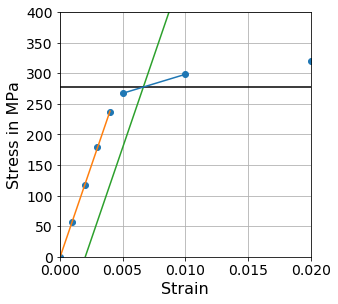

In [9]:
offset=0.002
σ_ys=278; ss=np.linspace(0,0.01,2)
yy=m*ss+b
AxesB.plot(ss+offset,yy);AxesB.set_xlim(0,.02);AxesB.set_ylim(0,400);
AxesB.axhline(σ_ys,c='k');
AxesB.add_line(matplotlib.lines.Line2D(Strain[5:7],Stress[5:7]));
print("The yield strength is {:.0f}.".format(σ_ys))
FigureB

## Determine the ultimate tensile strength of this alloy
This is the maximum value of the stress.

In [10]:
print("The ultimate tensile strength is {:.0f} MPa".format(Stress.max()))

The ultimate tensile strength is 369 MPa


## Determine the ductility in percent elongation
This is the maximum of the strain.

In [11]:
print("The strain at fracture is {:.3f}".format(Strain.max()))

The strain at fracture is 0.165


## Compute the modulus of resilience
The modulus of resilience is the area under the curve of the stress - stain plot.  The code below calculates that area by approximating that area as rectangles. 

In [12]:
a=Strain[0:len(Data.index)-1]; b=Strain[1:len(Data.index)];Δϵ=b-a;
a=Stress[0:len(Data.index)-1]; b=Stress[1:len(Data.index)]; h=(a+b)/2;
area=Δϵ*h;
print('The modulus of resilience is {:.1f} MPa'.format(area.sum()))

The modulus of resilience is 55.9 MPa


The plot below shows the stress stain curve with the area calculation rectangles.

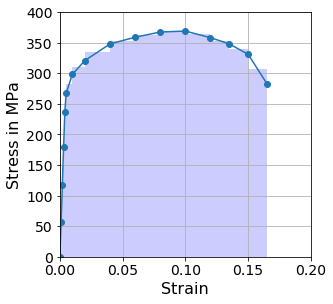

In [13]:
MyAxes.bar(Strain[0:len(Strain)-1]+Δϵ/2, h, Δϵ, alpha=0.2, color='b'); MyFigure